# Lecture 15: Monitoring ML experiements with mlflow

<img src="https://mlflow.org/docs/latest/_static/MLflow-logo-final-black.png" alt="MLflow Logo" width="400"/>

## Learning objectives

By the end of this lecture, students should be able to:
- Understand the purpose and components of MLflow.
- Learn how to set up and use MLflow for experiment tracking.
- Explore model management and deployment with MLflow.
- See practical examples of using MLflow in a machine learning project.

## Introduction
[MLflow](https://mlflow.org) is an open-source platform designed to manage the end-to-end machine learning lifecycle. It provides tools for experiment tracking, model management, and deployment, making it easier for data scientists and machine learning engineers to develop, track, and deploy machine learning models.

![](https://mlflow.org/img/hero.png)

## 1. Purpose of MLflow

### Why MLflow?
Machine learning projects often involve multiple stages, including data preprocessing, model training, hyperparameter tuning, and deployment. Managing these stages can be challenging, especially when working in a team. MLflow addresses these challenges by providing a unified platform to:

- **Track Experiments:** Record and compare different runs of your machine learning experiments.
- **Manage Models:** Store, version, and share machine learning models.
- **Deploy Models:** Deploy models to various environments, including cloud services and edge devices.



## 2. Components of MLflow

MLflow consists of four main components:

1. **MLflow Tracking:**
   - Allows you to log and query experiments.
   - Records parameters, metrics, and artifacts (e.g., model files, plots).

2. **MLflow Projects:**
   - Provides a standardized format for packaging data science code.
   - Facilitates reproducibility and sharing of projects.

3. **MLflow Models:**
   - Defines a standard format for packaging machine learning models.
   - Supports multiple flavors (e.g., Python function, TensorFlow, PyTorch).

4. **MLflow Model Registry:**
   - Centralized repository to manage model versions.
   - Supports model lifecycle management (e.g., staging, production).



## 3. Setting Up MLflow



### Installation on databricks


To use the mlflow experiement tracking function, you need to create a cluster that follows the ML template

1. Open data bricks community version: https://community.cloud.databricks.com
2. Under the `Compute` tab, select `Create compute`
3. Under `Databricks runtime version`, select the `ML` tab, and select the latest version
4. After waiting for the cluster up and running, you can create a new notebook. Now you can access the mlflow experiement tracking under the `experienment` tab on the left hand side
   
![](img/mlflow.png)


### If you're using vscode locally

- Install MLflow using pip:


In [34]:
# pip install mlflow

#### Starting the MLflow Tracking Server
Start the MLflow tracking server to log and view experiments:
- Open a terminal
- Type `mflow ui`

You should get an output along the line of

```python
[2024-10-28 20:24:27 -0700] [88575] [INFO] Starting gunicorn 23.0.0
[2024-10-28 20:24:27 -0700] [88575] [INFO] Listening at: http://127.0.0.1:5000 (88575)
[2024-10-28 20:24:27 -0700] [88575] [INFO] Using worker: sync
[2024-10-28 20:24:27 -0700] [88576] [INFO] Booting worker with pid: 88576
[2024-10-28 20:24:27 -0700] [88577] [INFO] Booting worker with pid: 88577
[2024-10-28 20:24:28 -0700] [88578] [INFO] Booting worker with pid: 88578
[2024-10-28 20:24:28 -0700] [88579] [INFO] Booting worker with pid: 88579
```

This command starts the MLflow UI, accessible at `http://127.0.0.1:5000`.

- Open a new web browser and paste in the mlflow ui link: http://127.0.0.1:5000 
- You should be able to see the mlflow tracking UI showing up now
  
![](img/mlflow_local.png)



## 4. Using MLflow for Experiment Tracking

#### Example: Tracking a Simple Experiment



Let's first import a housing dataset

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
import mlflow

# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [36]:
# input data
housing.data

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [37]:
# target column which is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000)
housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

We run a typical ML pipeline using linear regression

In [2]:
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
    
# Predict and evaluate
predictions = model.predict(X_test)
rmse = root_mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse}")

RMSE: 0.7455813830127763


**Set your mlflow ui**

Before running the mflow code, you need to specify where the mlflow ui is by running

In [3]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

### autologging

MLflow can automatically log training code written in many ML and deep learning frameworks. This is the easiest way to get started using MLflow tracking.

Okay, let's see how can we use mlflow to keep track of our experiments

In [4]:
# Enable autolog()
# mlflow.sklearn.autolog() requires mlflow 1.11.0 or above.
mlflow.sklearn.autolog()

# With autolog() enabled, all model parameters, a model score, and the fitted model are automatically logged.  
with mlflow.start_run():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
        
    # Predict and evaluate
    predictions = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, predictions)

2024/10/29 09:51:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run overjoyed-sheep-599 at: http://127.0.0.1:5000/#/experiments/0/runs/2344774fd4c7477099e0dc05a999f012.
2024/10/29 09:51:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


By default, mlflow.sklearn.autolog will log all model parameters and model scores.

### manual logging
You can also manually log the model, model parameters, evaluation metrics, and other artifacts using `mlflow.log_param()`, `mlflow.log_metric()`, `mlflow.log_model()`, and `mlflow.log_artifact()`. These functions let you control exactly which parameters and metrics are logged, and also let you log other artifacts of the run such as tables and plots.

In [5]:
from numpy import savetxt
# Disable autolog
mlflow.sklearn.autolog(disable=True)

# Further code without autologging
with mlflow.start_run():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
        
    # Predict and evaluate
    predictions = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, predictions)
    
    # Manually log parameters, metrics, and model
    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_metric("rmse", rmse)
    mlflow.sklearn.log_model(model, "model")
      
    # Save the table of predicted values
    savetxt('predictions.csv', predictions, delimiter=',')
    
    # Log the saved table as an artifact
    mlflow.log_artifact("predictions.csv")

2024/10/29 09:57:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/29 09:57:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run bald-slug-722 at: http://127.0.0.1:5000/#/experiments/0/runs/9fba11a4f4f64fe89c29cb65c3d7af17.
2024/10/29 09:57:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.




**View Results in MLflow UI**

Open the MLflow UI at `http://127.0.0.1:5000` to view the logged experiment.



## 5. Model Management and Deployment with MLflow



## 6. Practical Examples

#### Example 1: Hyperparameter Tuning
Track different hyperparameter configurations and their performance metrics.



In [42]:

# Enable MLflow autologging
mlflow.sklearn.autolog()

In [6]:
with mlflow.start_run():
    model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, predictions)
    
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("max_depth", 10)
    mlflow.log_param("model_type", "RandomForestRegressor")
    mlflow.log_metric("rmse", rmse)
    mlflow.sklearn.log_model(model, "model")

2024/10/29 10:00:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/29 10:00:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run rogue-foal-91 at: http://127.0.0.1:5000/#/experiments/0/runs/f61806c0449e4857a7019881fd9294c7.
2024/10/29 10:00:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.




#### Example 2: Logging Artifacts
Log additional artifacts such as plots and data files.



2024/10/29 10:06:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/29 10:06:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run flawless-gnat-386 at: http://127.0.0.1:5000/#/experiments/0/runs/855834f31a20438ab8f998fdc6dc7c7d.
2024/10/29 10:06:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


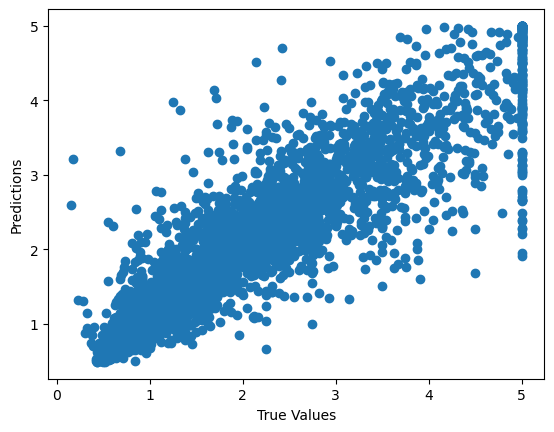

In [11]:
import matplotlib.pyplot as plt

with mlflow.start_run():
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, predictions)
    
    mlflow.log_param("n_estimators", 100)
    mlflow.log_metric("rmse", rmse)
    mlflow.sklearn.log_model(model, "model")
    mlflow.log_param("model_type", "RandomForestRegressor")
    
    # Log a plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.savefig("scatter_plot.png")
    mlflow.log_artifact("scatter_plot.png")



#### Example 3: Running multiple models



In [8]:
# Define the models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5)
}

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

mlflow.sklearn.autolog()

# Train and log each model
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict and evaluate
        predictions = model.predict(X_test)
        rmse = root_mean_squared_error(y_test, predictions)
        
        # Log parameters, metrics, and model
        # mlflow.log_param("model_type", model_name)
        # mlflow.log_metric("rmse", rmse)
        # mlflow.sklearn.log_model(model, "model")
        
        # print(f"{model_name} - RMSE: {rmse}")

2024/10/29 10:03:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run LinearRegression at: http://127.0.0.1:5000/#/experiments/0/runs/f3c56cf61be440b0819890ec88558b98.
2024/10/29 10:03:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.
2024/10/29 10:03:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForestRegressor at: http://127.0.0.1:5000/#/experiments/0/runs/0270a42fcf944cd8b8bcdd18d1773354.
2024/10/29 10:03:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.
2024/10/29 10:03:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run KNeighborsRegressor at: http://127.0.0.1:5000/#/experiments/0/runs/64925094ac02446a9e046328b3efcbba.
2024/10/29 10:03:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.




---

### Conclusion

MLflow is a powerful platform for managing the machine learning lifecycle. It provides tools for experiment tracking, model management, and deployment, making it easier to develop, track, and deploy machine learning models. By integrating MLflow into your workflow, you can improve reproducibility, collaboration, and efficiency in your machine learning projects.

### References
- [MLflow Documentation](https://mlflow.org/docs/latest/index.html)
- [MLflow GitHub Repository](https://github.com/mlflow/mlflow)
- [MLflow Examples](https://mlflow.org/docs/latest/tutorials-and-examples/index.html)
